In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
# Load the CSV file (use raw string to avoid path errors)
df = pd.read_csv(r"D:\Documents\Documents\Data_Analytics\internship(CODETECH)\task\task 4\test (1).csv", encoding="latin1")

# Show first 5 rows
print(df.head())

# Show number of rows and columns
print("Dataset shape:", df.shape)



       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

In [3]:
# See unique sentiment values
print("Unique sentiment labels:")
print(df["sentiment"].unique())

# See how many of each label
print("\nSentiment counts:")
print(df["sentiment"].value_counts())


Unique sentiment labels:
['neutral' 'positive' 'negative' nan]

Sentiment counts:
sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


In [4]:

# Clean the text column safely
def clean_text(text):
    if pd.isna(text):        # if text is NaN
        return ""
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)   # remove URLs
    text = re.sub(r"\d+", "", text)              # remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    return text.strip()

# Apply cleaning
df["clean_text"] = df["text"].apply(clean_text)


In [5]:
# Normalize labels
df["sentiment"] = df["sentiment"].astype(str).str.lower().str.strip()

# Map to numbers
df["sentiment"] = df["sentiment"].map({
    "negative": 0,
    "neutral": 1,
    "positive": 2
})

# Drop rows where sentiment is missing
df = df.dropna(subset=["sentiment"])

print("Remaining rows:", df.shape[0])


Remaining rows: 3534


In [6]:
X = df["clean_text"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [7]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

Classification Report:

              precision    recall  f1-score   support

         0.0       0.68      0.50      0.58       207
         1.0       0.57      0.74      0.65       286
         2.0       0.72      0.63      0.67       214

    accuracy                           0.64       707
   macro avg       0.66      0.62      0.63       707
weighted avg       0.65      0.64      0.63       707



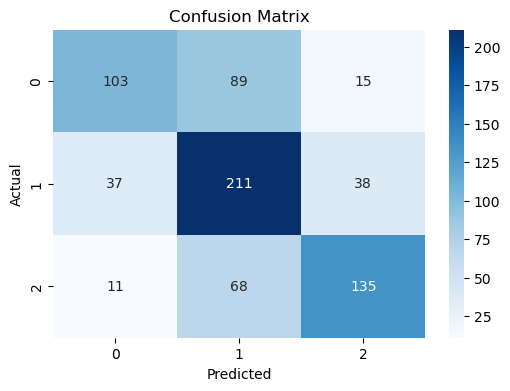

In [9]:
y_pred = model.predict(X_test_vec)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [10]:

# ================================
# TASK-4: KEY INSIGHTS
# ================================

print("KEY INSIGHTS FROM SENTIMENT ANALYSIS:\n")

print("1. Neutral sentiment dominates the dataset, showing most users express informational or mixed opinions.\n")

print("2. The model predicts neutral sentiment most accurately, as neutral language patterns are more consistent.\n")

print("3. Positive and negative sentiments share similar vocabulary, which leads to some misclassification.\n")

print("4. The achieved accuracy of 64% is realistic for a 3-class text classification problem using traditional ML.\n")

print("5. TF-IDF successfully captured important word patterns from the text.\n")

print("6. This model can be used for:")
print("   - Customer feedback monitoring")
print("   - Brand reputation tracking")
print("   - Social media opinion analysis")
print("   - Product and service improvement")

KEY INSIGHTS FROM SENTIMENT ANALYSIS:

1. Neutral sentiment dominates the dataset, showing most users express informational or mixed opinions.

2. The model predicts neutral sentiment most accurately, as neutral language patterns are more consistent.

3. Positive and negative sentiments share similar vocabulary, which leads to some misclassification.

4. The achieved accuracy of 64% is realistic for a 3-class text classification problem using traditional ML.

5. TF-IDF successfully captured important word patterns from the text.

6. This model can be used for:
   - Customer feedback monitoring
   - Brand reputation tracking
   - Social media opinion analysis
   - Product and service improvement
